# Imports

In [52]:
import pandas as pd
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Reading the dataset

In [53]:
dataset = pd.read_csv("iris.csv") # Reading the dataset
dataset.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# Preprocessing

## Label encoding of the output

In [54]:
label_encoder = LabelEncoder() # Label encoding of the output
dataset['Species'] = label_encoder.fit_transform(dataset['Species'])
dataset

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


## Converting the input into nump array

In [55]:
# Converting the input cols into numpy array which is the preffered input format for keras
np_dataset = dataset.to_numpy()

## Separating inputs and output

In [56]:
# Separating the inputs and outputs
X_data = np_dataset[:,0:4]
Y_data = np_dataset[:,4]

In [57]:
X_data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [58]:
Y_data[:5]

array([0., 0., 0., 0., 0.])

## Scaling the input

In [59]:
# Seeting up the standard scale of the input values
scaler = StandardScaler().fit(X_data)
X_data = scaler.transform(X_data)
X_data[:5]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

In [60]:
# One hot encoding of the output column
Y_data = tf.keras.utils.to_categorical(Y_data,3)

In [61]:
Y_data[:5]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

## Splitting training and test data

In [62]:
# splitting the train and test data
x_train, x_test, y_train, y_test = train_test_split(X_data, Y_data, test_size=0.10)

In [63]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(135, 4) (135, 3) (15, 4) (15, 3)


# Creating the deep learning model

In [64]:
NB_CLASSES = 3 # Number of output categories

#Creating a Sequential Model
model = keras.models.Sequential() #Initialization of Sequential Model

# Adding the first hidden layer in the model
model.add(
    keras.layers.Dense(
        128, #Number of nodes
        input_shape=(4,), # Number of input variable
        name = "Hidden-Layer-1", # Layer name
        activation = 'relu' # Activation function
    )
)

# Adding the second hidden layer in the model
model.add(
    keras.layers.Dense(
        128,
        name="Hidden-Layer-2",
        activation='relu'
    )
)

# Adding the output layer in the model
model.add(
    keras.layers.Dense(
        NB_CLASSES, #number of outputs
        name="Output-Layer",
        activation='softmax' #getting the probabilities of each output
    )
)

# Use of categorical_crossentropy loss function because it is a multi-class classification
model.compile(loss="categorical_crossentropy", metrics=['accuracy'])

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden-Layer-1 (Dense)      (None, 128)               640       
                                                                 
 Hidden-Layer-2 (Dense)      (None, 128)               16512     
                                                                 
 Output-Layer (Dense)        (None, 3)                 387       
                                                                 
Total params: 17,539
Trainable params: 17,539
Non-trainable params: 0
_________________________________________________________________


# Training and evaluation of the model

In [70]:
VERBOSE = 1 # Used to see the progress of the model
BATCH_SIZE = 16
EPOCHS = 10
VALIDATION_SPLIT = 0.2 # Setting the 20% of the training data for validation

# Training of the model
history = model.fit(
    x_train,
    y_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_split=VALIDATION_SPLIT,
    verbose=VERBOSE,
)

Epoch 1/10
7/7 [==============================] - 0s 26ms/step - loss: 0.1483 - accuracy: 0.9537 - val_loss: 0.1687 - val_accuracy: 0.9630
Epoch 2/10
7/7 [==============================] - 0s 16ms/step - loss: 0.1461 - accuracy: 0.9444 - val_loss: 0.1842 - val_accuracy: 0.9630
Epoch 3/10
7/7 [==============================] - 0s 14ms/step - loss: 0.1329 - accuracy: 0.9537 - val_loss: 0.1793 - val_accuracy: 0.9630
Epoch 4/10
7/7 [==============================] - 0s 14ms/step - loss: 0.1244 - accuracy: 0.9537 - val_loss: 0.1919 - val_accuracy: 0.9259
Epoch 5/10
7/7 [==============================] - 0s 15ms/step - loss: 0.1123 - accuracy: 0.9537 - val_loss: 0.2246 - val_accuracy: 0.9259
Epoch 6/10
7/7 [==============================] - 0s 14ms/step - loss: 0.1183 - accuracy: 0.9537 - val_loss: 0.1599 - val_accuracy: 0.9630
Epoch 7/10
7/7 [==============================] - 0s 15ms/step - loss: 0.1099 - accuracy: 0.9537 - val_loss: 0.1551 - val_accuracy: 0.9630
Epoch 8/10
7/7 [===========

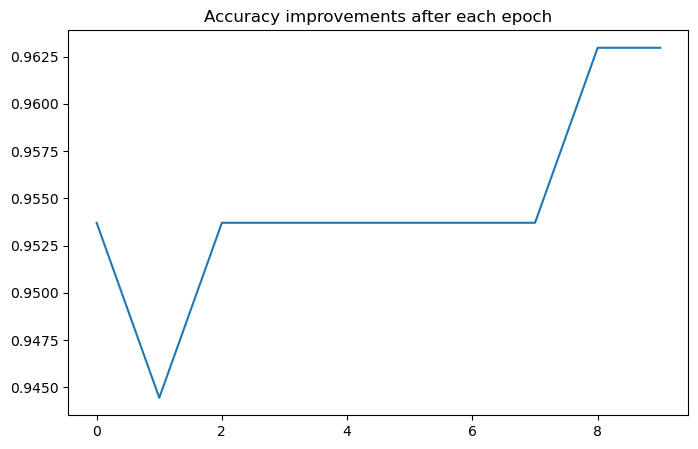

In [71]:
# Plot the accuracy of the model after each epoch
pd.DataFrame(history.history)['accuracy'].plot(figsize=(8,5))
plt.title("Accuracy improvements after each epoch")
plt.show()

In [72]:
# Evaluation of teh model on test data
model.evaluate(x_test,y_test)

1/1 [==============================] - 0s 35ms/step - loss: 0.1379 - accuracy: 0.9333


[0.1378655731678009, 0.9333333373069763]

# Saving and Loading the Model

In [73]:
# Saving the model using save() function
model.save('Trained Iris Model')

#Loading the saved model using load_model() function
loaded_model = keras.models.load_model('Trained Iris Model')

#Printing Summary of the loaded model
loaded_model.summary()

INFO:tensorflow:Assets written to: Trained Iris Model\assets
INFO:tensorflow:Assets written to: Trained Iris Model\assets
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden-Layer-1 (Dense)      (None, 128)               640       
                                                                 
 Hidden-Layer-2 (Dense)      (None, 128)               16512     
                                                                 
 Output-Layer (Dense)        (None, 3)                 387       
                                                                 
Total params: 17,539
Trainable params: 17,539
Non-trainable params: 0
_________________________________________________________________


# Prediction on unseen data

In [74]:
#Raw prediction data
prediction_input = [[6.6, 3. , 4.4, 1.4]]

#Scale prediction data with the same scaling model
scaled_input = scaler.transform(prediction_input)

#Get raw prediction probabilities
raw_prediction = model.predict(scaled_input)
print("Raw Prediction Output (Probabilities) :" , raw_prediction)

#Find prediction
prediction = np.argmax(raw_prediction)
print("Prediction is ", label_encoder.inverse_transform([prediction]))

1/1 [==============================] - 0s 28ms/step
Raw Prediction Output (Probabilities) : [[7.6057133e-04 9.5731044e-01 4.1928943e-02]]
Prediction is  ['versicolor']
